In [10]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [11]:
im = cv2.imread('./images/books.jpeg')
grid_size = 8
saliency_maps ={}
sara_heatmaps = {}

**Itti**

In [12]:
saliency_maps['itti'] = sara.return_saliency(im.copy(), generator='itti')
sara.reset()

sara_heatmaps['sara_itti'] = sara.return_sara(im.copy(), grid_size, generator='itti')
sara.reset()

**DeepGaze IIE**

In [13]:
saliency_maps['deepgaze'] = sara.return_saliency(im.copy(), generator='deepgaze')
sara.reset()

sara_heatmaps['sara_deepgaze'] = sara.return_sara(im.copy(), grid_size, generator='deepgaze')
sara.reset()

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Work\uni\Summer Placement\SaRa\SaRa\benchmarking\saraRC1.py:111: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  image_tensor = torch.tensor([image.transpose(2, 0, 1)]).to(DEVICE)


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


**FPN**

In [14]:
sara.return_saliency(im.copy(), generator='fpn')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [15]:
saliency_maps['fpn'] = sara.return_saliency(im.copy(), generator='fpn')
sara.reset()

sara_heatmaps['sara_fpn'] = sara.return_sara(im.copy(), grid_size, generator='fpn')
sara.reset()

**MSI-Net**

In [16]:
# sara.return_saliency(im.copy(), generator='msinet')

In [17]:
# saliency_maps['fpn'] = sara.return_saliency(im.copy(), generator='msinet')
# sara.reset()

# sara_heatmaps['sara_fpn'] = sara.return_sara(im.copy(), grid_size, generator='msinet')
# sara.reset()

**Multi-Plot**

In [20]:
img_path = './images'
imgs = []

for root, dirs, files in os.walk(img_path):
    for file in files:
        imgs.append(cv2.cvtColor(cv2.imread(os.path.join(root, file)), cv2.COLOR_BGR2RGB))

In [21]:
grid_size = 8
saliency_maps = {}
sara_heatmaps = {}

Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


Loaded pretrained weights for efficientnet-b5


Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0
Using cache found in C:\Users\Matthew Kenely/.cache\torch\hub\pytorch_vision_v0.6.0


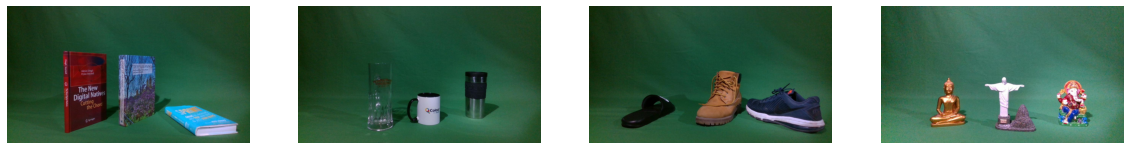

In [22]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.tight_layout()

for i, im in enumerate(imgs):
    if i not in saliency_maps:
        saliency_maps[i] = {}
        sara_heatmaps[i] = {}

    saliency_maps[i]['itti'] = sara.return_saliency(im.copy(), generator='itti')
    sara.reset()

    sara_heatmaps[i]['sara_itti'] = sara.return_sara(im.copy(), grid_size, generator='itti')
    sara.reset()

    saliency_maps[i]['deepgaze'] = sara.return_saliency(im.copy(), generator='deepgaze')
    sara.reset()

    sara_heatmaps[i]['sara_deepgaze'] = sara.return_sara(im.copy(), grid_size, generator='deepgaze')
    sara.reset()

    saliency_maps[i]['fpn'] = sara.return_saliency(im.copy(), generator='fpn')
    sara.reset()

    sara_heatmaps[i]['sara_fpn'] = sara.return_sara(im.copy(), grid_size, generator='fpn')
    sara.reset()
    
    plt.subplot(1, len(imgs), i+1)
    plt.imshow(im)
    plt.axis('off')

0 itti
0 deepgaze
0 fpn
1 itti
1 deepgaze
1 fpn
2 itti
2 deepgaze
2 fpn
3 itti
3 deepgaze
3 fpn


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


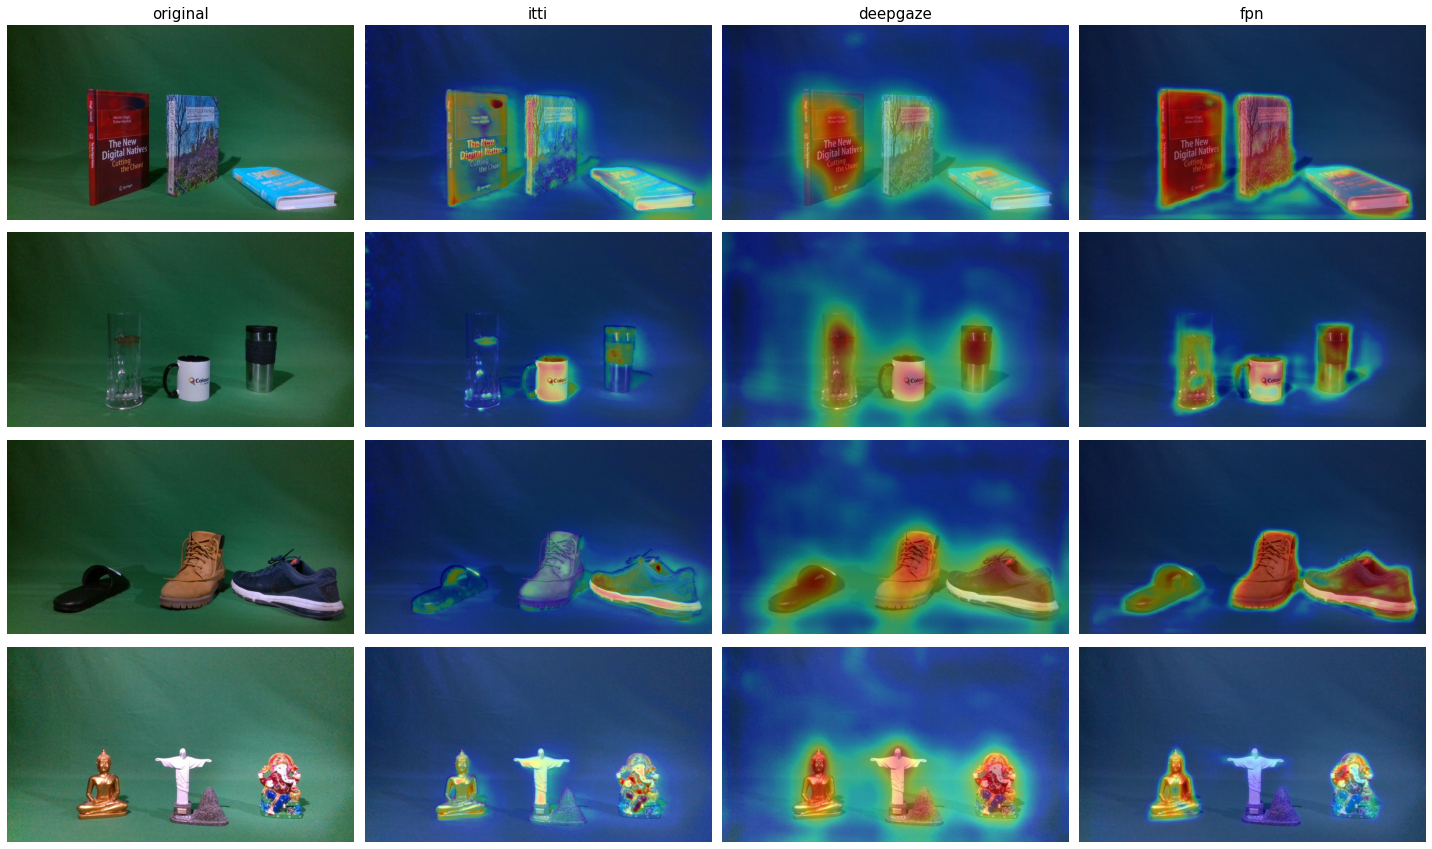

In [23]:
plt.rcParams['figure.figsize'] = [20, 14.8]
plt.figure()
plt.title('Saliency Maps')

i = 0

for img in saliency_maps:
    # Show original on the left
    plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+1)
    plt.imshow(imgs[img])
    plt.axis('off')
    i += 1
    
    for technique in saliency_maps[img]:
        print(img, technique)
        plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+1)
        plt.imshow(imgs[img])
        plt.imshow(saliency_maps[img][technique], cmap='jet', alpha=0.4)
        plt.axis('off')
        i += 1

# Add column labels
i = 0
plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+1)
plt.title('original', fontsize=15)


for i, technique in enumerate(saliency_maps[img]):
    plt.subplot(len(saliency_maps) + 1, len(saliency_maps[img]) + 1, i+2)
    plt.title(technique, fontsize=15)


plt.tight_layout()
plt.show()

In [ ]:
sara_heatmaps[0]['sara_itti']

(array([[[  0,  14,   0],
         [  5,  22,   7],
         [  8,  28,  12],
         ...,
         [ 18,  47,  20],
         [ 19,  48,  23],
         [ 19,  48,  23]],
 
        [[  5,  22,   6],
         [ 11, 105,  90],
         [ 13, 107,  92],
         ...,
         [ 18, 124,  98],
         [ 19, 125, 100],
         [ 19, 125, 100]],
 
        [[ 11,  27,  12],
         [ 15, 109,  93],
         [ 15, 109,  93],
         ...,
         [ 20, 124,  98],
         [ 20, 124, 100],
         [ 18, 123,  98]],
 
        ...,
 
        [[ 29,  66,  34],
         [ 28, 142,  34],
         [ 29, 142,  34],
         ...,
         [ 22,  89, 102],
         [ 22,  89, 102],
         [ 22,  89, 102]],
 
        [[ 25,  64,  30],
         [ 24, 140,  30],
         [ 26, 140,  31],
         ...,
         [ 24,  86, 101],
         [ 26,  88, 103],
         [ 27,  90, 104]],
 
        [[ 23,  64,  29],
         [ 23, 139,  29],
         [ 24, 139,  29],
         ...,
         [ 25,  85, 101],
  

0 sara_itti
0 sara_deepgaze
0 sara_fpn
1 sara_itti
1 sara_deepgaze
1 sara_fpn
2 sara_itti
2 sara_deepgaze
2 sara_fpn
3 sara_itti
3 sara_deepgaze
3 sara_fpn


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


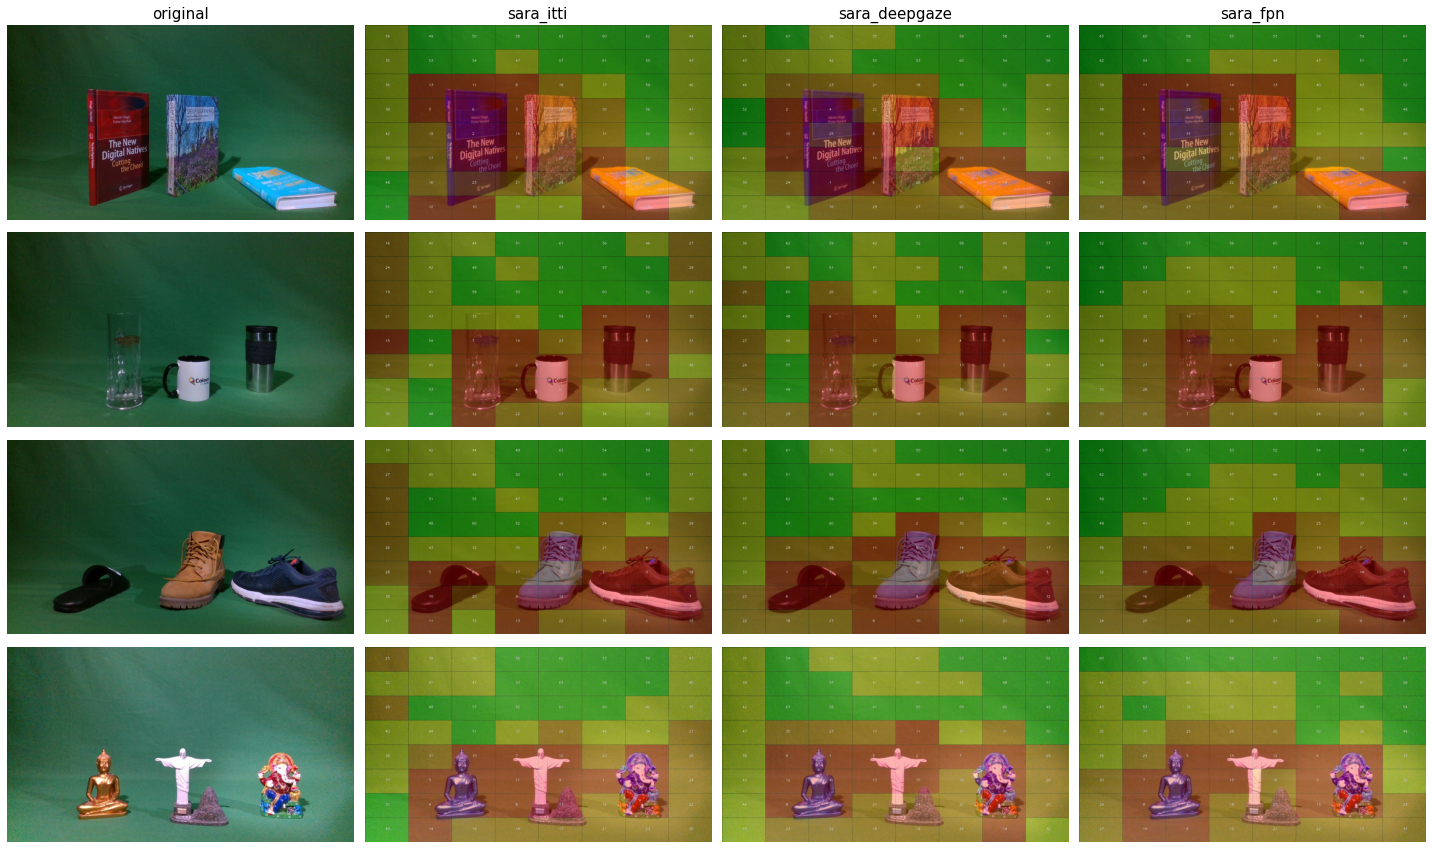

In [29]:
plt.rcParams['figure.figsize'] = [20, 14.8]
plt.figure()
plt.title('Sara Heatmaps')

i = 0

for img in sara_heatmaps:
    # Show original on the left
    plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+1)
    plt.imshow(imgs[img])
    plt.axis('off')
    i += 1
    
    for technique in sara_heatmaps[img]:
        print(img, technique)
        plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+1)
        plt.imshow(cv2.cvtColor(sara_heatmaps[img][technique][0], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        i += 1

# Add column labels
i = 0
plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+1)
plt.title('original', fontsize=15)


for i, technique in enumerate(sara_heatmaps[img]):
    plt.subplot(len(sara_heatmaps) + 1, len(sara_heatmaps[img]) + 1, i+2)
    plt.title(technique, fontsize=15)


plt.tight_layout()
plt.show()